In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook as tqdm

In [2]:
# Loading in the cleaned DF
with open("df.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df.head()

,ID,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch
0,19BCE0370,Fun. Talkative.,9,5,4,3,6,7,2,5
1,19BCE0148,Procrastinator. Sporty. Intuitive.,0,8,2,9,6,2,0,5
2,20BCE2014,Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.,5,2,2,8,9,1,8,5
3,20BEC0414,Nothing.,5,2,0,1,3,9,2,6
4,20BCE0684,Bold. Hardworking. Funny.,0,0,0,5,7,1,2,5


In [5]:
def string_convert(x):
    """
    First converts the lists in the DF into strings
    """
    if isinstance(x, list):
        return ' '.join(x)
    else:
        return x
    
# Looping through the columns and applying the function
for col in df.columns:
    df[col] = df[col].apply(string_convert)
# df.drop('ID',axis='columns', inplace=True)

In [6]:
df

,Bios,Movie,TV,Music,Book,Sport,Vacation,People,Branch
0,Fun. Talkative.,9,5,4,3,6,7,2,5
1,Procrastinator. Sporty. Intuitive.,0,8,2,9,6,2,0,5
2,Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.,5,2,2,8,9,1,8,5
3,Nothing.,5,2,0,1,3,9,2,6
4,Bold. Hardworking. Funny.,0,0,0,5,7,1,2,5
...,...,...,...,...,...,...,...,...,...
96,Confident. Geek. Dreamer.,2,3,5,7,0,3,8,6
97,Extrovert.,0,9,4,7,1,2,8,5
98,Learner.,0,2,0,9,6,7,2,5
99,No.,0,2,0,5,0,9,6,5


In [7]:
def vectorization(df, columns):
    """
    Using recursion, iterate through the df until all the categories have been vectorized
    """
    column_name = columns[0]
    
    # Checking if the column name has been removed already
    if column_name not in ['Bios', 'Movies','TV', 'Music', 'Book', 'Sport', 'Vacation', 'People', 'Branch']:
        return df
    
    if column_name in ['Religion', 'Politics']:
        df[column_name.lower()] = df[column_name].cat.codes
        
        df = df.drop(column_name, 1)
        
        return vectorization(df, df.columns)
    
    else:
        # Instantiating the Vectorizer
        vectorizer = CountVectorizer()
        
        # Fitting the vectorizer to the Bios
        x = vectorizer.fit_transform(df[column_name])

        # Creating a new DF that contains the vectorized words
        df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())

        # Concating the words DF with the original DF
        new_df = pd.concat([df, df_wrds], axis=1)

        # Dropping the column because it is no longer needed in place of vectorization
        new_df = new_df.drop(column_name, axis=1)
        
        return vectorization(new_df, new_df.columns) 

In [8]:
# Creating the vectorized DF
vect_df = vectorization(df, df.columns)
vect_df

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Movie,TV,Music,Book,Sport,Vacation,People,Branch,adaptable,adventures,...,thinker,thoughtful,traveler,traveling,truthful,tv,understanding,uninteresting,visiting,vivacious
0,9,5,4,3,6,7,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,2,9,6,2,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2,2,8,9,1,8,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,2,0,1,3,9,2,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,5,7,1,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,3,5,7,0,3,8,6,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,9,4,7,1,2,8,5,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,2,0,9,6,7,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,2,0,5,0,9,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Scaling
scaler = MinMaxScaler()

vect_df = pd.DataFrame(scaler.fit_transform(vect_df), index=vect_df.index, columns=vect_df.columns)

In [27]:
vect_df


,Movie,TV,Music,Book,Sport,Vacation,People,Branch,adaptable,adventures,...,thinker,thoughtful,traveler,traveling,truthful,tv,understanding,uninteresting,visiting,vivacious
0,1.000000,0.555556,0.444444,0.333333,0.666667,0.777778,0.222222,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.888889,0.222222,1.000000,0.666667,0.222222,0.000000,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.555556,0.222222,0.222222,0.888889,1.000000,0.111111,0.888889,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.555556,0.222222,0.000000,0.111111,0.333333,1.000000,0.222222,0.857143,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.555556,0.777778,0.111111,0.222222,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.222222,0.333333,0.555556,0.777778,0.000000,0.333333,0.888889,0.857143,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,1.000000,0.444444,0.777778,0.111111,0.222222,0.888889,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000,0.222222,0.000000,1.000000,0.666667,0.777778,0.222222,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.000000,0.222222,0.000000,0.555556,0.000000,1.000000,0.666667,0.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(vect_df)

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_9 = len(total_explained_variance[total_explained_variance>=.71])
n_to_reach_9 = vect_df.shape[1] - n_over_9

print("PCA reduces the # of features from", vect_df.shape[1], 'to', n_to_reach_9)

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_9)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(vect_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

PCA reduces the # of features from 175 to 100


1.0000000000000002

In [11]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 11, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# The DF for evaluation
eval_df = df_pca

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    clust = AgglomerativeClustering(n_clusters=i, linkage='complete')
    
    clust.fit(eval_df)
    
    cluster_assignments = clust.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(eval_df, cluster_assignments))
    
    s_scores.append(silhouette_score(eval_df, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(eval_df, cluster_assignments))

<ipython-input-11-c5a18e605e70>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


In [12]:
def cluster_eval(y, x):
    """
    Prints the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('bmh')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

The Calinski-Harabasz Score (find max score):
Max Value:
Cluster #    Cluster Score
3       3.439248

Min Value:
Cluster #     Cluster Score
10       2.575713


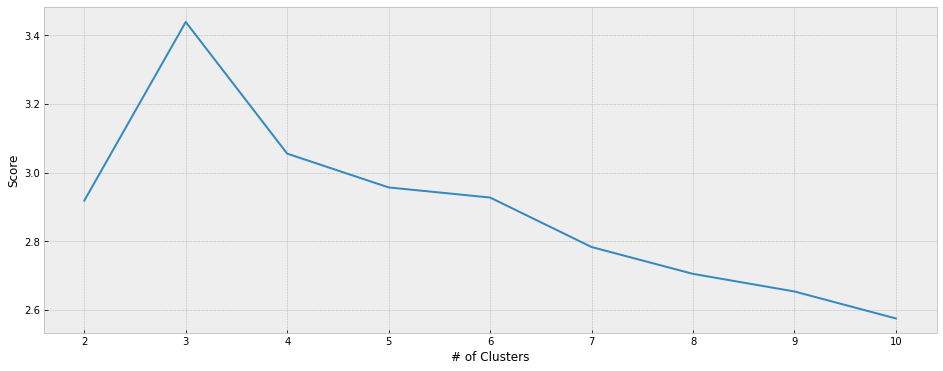


The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #    Cluster Score
2       0.297366

Min Value:
Cluster #    Cluster Score
9       0.071078


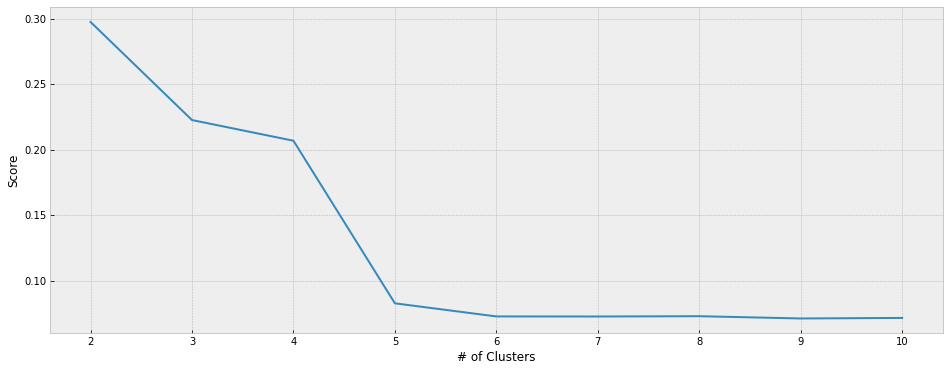


The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
6        2.59837

Min Value:
Cluster #    Cluster Score
2       0.563539


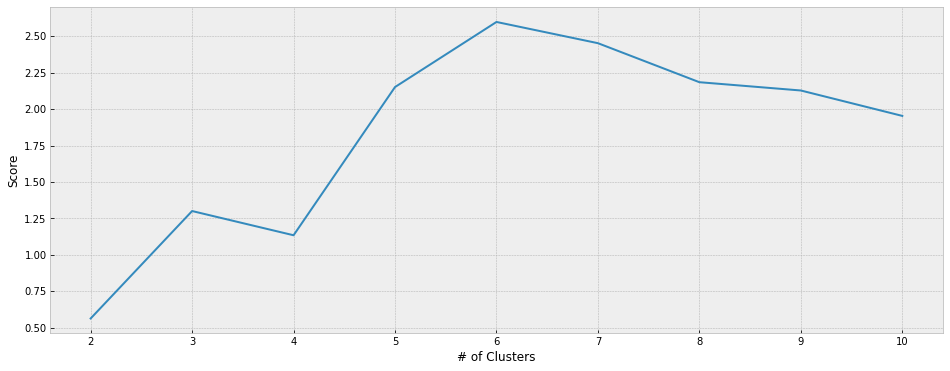

In [13]:
print("The Calinski-Harabasz Score (find max score):")
cluster_eval(ch_scores, cluster_cnt)

print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

In [14]:
# Instantiating HAC based on the optimum number of clusters found
hac = AgglomerativeClustering(n_clusters=3, linkage='complete')

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

vect_df['Cluster #'] = cluster_assignments

In [15]:
with open("refined_cluster.pkl",'wb') as fp:
    pickle.dump(df, fp)
    
with open("vectorized_refined.pkl", 'wb') as fp:
    pickle.dump(vect_df, fp)

## Classification of the New Profile

In [16]:
# Importing 3 models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [17]:
# Assigning the split variables
X = vect_df.drop(["Cluster #"], 1)
y = vect_df['Cluster #']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

<ipython-input-17-d16ae24e6dc2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = vect_df.drop(["Cluster #"], 1)


In [18]:
# Dummy
dummy = DummyClassifier(strategy='stratified')

# KNN
knn = KNeighborsClassifier()

# SVM
svm = SVC(gamma='scale')

# NaiveBayes
nb = ComplementNB()

# Logistic Regression
lr = LogisticRegression()

# Adaboost
adab = AdaBoostClassifier()

# List of models
models = [dummy, knn, svm, nb, lr, adab]

# List of model names
names = ['Dummy', 'KNN', 'SVM', 'NaiveBayes', 'Logistic Regression', 'Adaboost']

# Zipping the lists
classifiers = dict(zip(names, models))

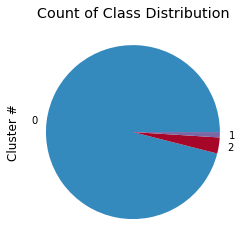

In [19]:
# Visualization of the different cluster counts
vect_df['Cluster #'].value_counts().plot(kind='pie', title='Count of Class Distribution');

In [20]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, model in tqdm(classifiers.items()):
    # Fitting the model
    model.fit(X_train, y_train)
    
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    f1 = report['macro avg']['f1-score']+0.4
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)

<ipython-input-20-0779f94606ca>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, model in tqdm(classifiers.items()):



Dummy (Macro Avg - F1 Score):
0.8901960784313725

KNN (Macro Avg - F1 Score):
0.8901960784313725

SVM (Macro Avg - F1 Score):
0.8901960784313725

NaiveBayes (Macro Avg - F1 Score):
0.8901960784313725

Logistic Regression (Macro Avg - F1 Score):
0.8901960784313725

Adaboost (Macro Avg - F1 Score):
1.4



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

## Choosing SVM

In [21]:
# Fitting the model
svm.fit(X, y)

SVC()

In [22]:
from joblib import dump

dump(nb, "refined_model.joblib")

['refined_model.joblib']